In [1]:
%reload_ext autoreload
%autoreload 2

In [2]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
import matplotlib.pyplot as plt
import numpy as np
import pytorch_lightning as pl
import random
%matplotlib inline

In [3]:
from rbfxor.modeling import BaseMLP
from rbfxor.functional import PiecewiseRBF
from rbfxor.dataset import XORDataset, true_xor

## Setting up pytorch-lightning

2


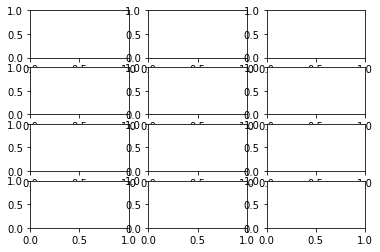

In [11]:
fig, axes = plt.subplots(4,3)

In [13]:
axes.flatten()

array([<matplotlib.axes._subplots.AxesSubplot object at 0x134031450>,
      dtype=object)

INFO:root:       Name          Type Params
0    layers    Sequential    9  
1  layers.0        Linear    6  
2  layers.1  PiecewiseRBF    0  
3  layers.2        Linear    3  
4  layers.3       Sigmoid    0  
5      loss       MSELoss    0  
Epoch 3: 100%|██████████| 20/20 [00:00<00:00, 257.04batch/s, batch_nb=15, loss=0.212, v_nb=366]
INFO:root:       Name          Type Params
0    layers    Sequential    9  
1  layers.0        Linear    6  
2  layers.1  PiecewiseRBF    0  
3  layers.2        Linear    3  
4  layers.3       Sigmoid    0  
5      loss       MSELoss    0  
Epoch 3: 100%|██████████| 20/20 [00:00<00:00, 219.23batch/s, batch_nb=15, loss=0.229, v_nb=367]
INFO:root:       Name          Type Params
0    layers    Sequential    9  
1  layers.0        Linear    6  
2  layers.1  PiecewiseRBF    0  
3  layers.2        Linear    3  
4  layers.3       Sigmoid    0  
5      loss       MSELoss    0  
Epoch 3: 100%|██████████| 20/20 [00:00<00:00, 214.05batch/s, batch_nb=15, loss=0.240,

Epoch 3: 100%|██████████| 20/20 [00:00<00:00, 228.47batch/s, batch_nb=15, loss=0.255, v_nb=374]


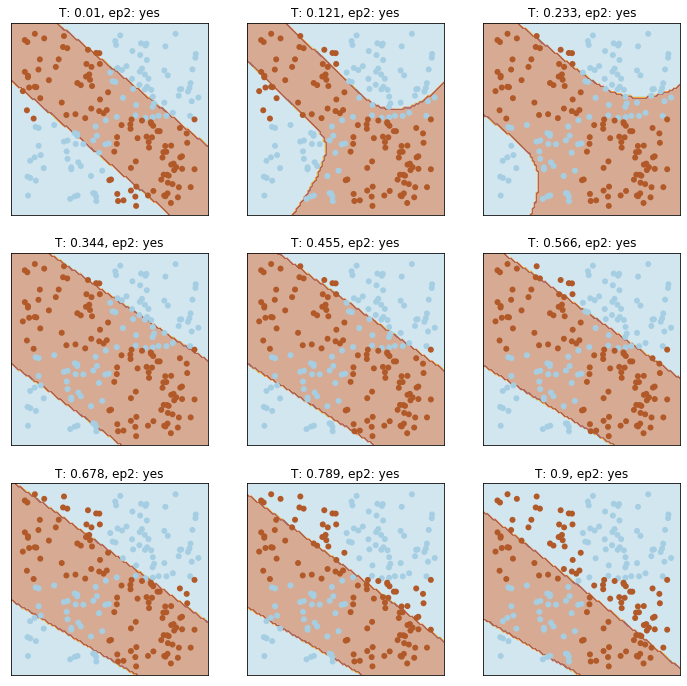

In [35]:
from pytorch_lightning import Trainer

ds_train = XORDataset(10)
ds_test = XORDataset(100)

Ts = torch.linspace(0.01, 0.9, 9)

def train_and_plot(T, ax):
    # model = BaseMLP([8], nn.ReLU(), nn.Sigmoid())
    model = BaseMLP([2], PiecewiseRBF(T=T, rbf_at_0=0.5, ep2=0.6), nn.Sigmoid())
    trainer = Trainer()
    trainer.fit(model)
    model.plot('test', ax)

fig, axes = plt.subplots(3,3, figsize=(12, 12))

title = "T: {:0.3}, ep2: {}"

for ax, T in zip(axes.flatten(), Ts):
    train_and_plot(T, ax)
    ax.get_yaxis().set_visible(False)
    ax.get_xaxis().set_visible(False)
    ax.set_title(title.format(T, "yes"))
#     plt.title(title.format(T, "yes"))
    
plt.show()

## Path Forward

- Can a single layer perceptron (SLP) learn the XOR function with a sigmoid?
- Can a SLP learn the XOR with a ReLU
- Can a MLP learn the XOR?

- Can a SLP learn the XOR function with a hardcoded DoubleRBF activation function?
- Can a SLP learn the XOR function with a trainable DoubleRBF activation function?

Still to code:
- Plot the decision map of the trained model (in blue/red), under all the data points of the dataset
- Can I show a decision boundary?